In [1]:
import mitsuba as mi
import drjit as dr
from matplotlib import pyplot as plt
import numpy as np

mi.set_variant("llvm_ad_spectral_polarized")
mi.variants()

['scalar_rgb',
 'scalar_spectral',
 'scalar_spectral_polarized',
 'llvm_ad_rgb',
 'llvm_ad_mono',
 'llvm_ad_mono_polarized',
 'llvm_ad_spectral',
 'llvm_ad_spectral_polarized',
 'cuda_ad_rgb',
 'cuda_ad_mono',
 'cuda_ad_mono_polarized',
 'cuda_ad_spectral',
 'cuda_ad_spectral_polarized']

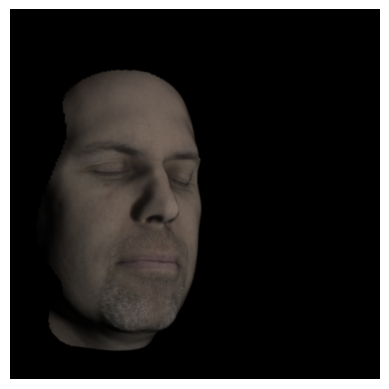

In [2]:
scene = mi.load_file("face_normal_scene.xml")
image = mi.render(scene, spp=512)

plt.axis("off")
plt.imshow(image ** (1.0 / 2.2))
plt.show()

In [3]:
spp = 512
scene = mi.load_file("face_normal_scene.xml")

parallel = mi.render(scene, spp=spp)

params = mi.traverse(scene)
params["polarizer_cam.bsdf.theta.value"] = 90
params.update()

orthogonal = mi.render(scene, spp=spp)

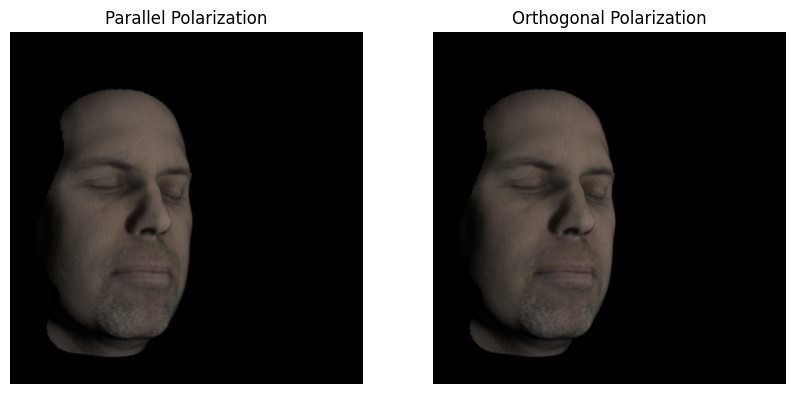

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 20))

ax[0].imshow(parallel ** (1.0 / 2.2))
ax[0].axis("off")
ax[0].set_title("Parallel Polarization")

ax[1].imshow(orthogonal ** (1.0 / 2.2))
ax[1].axis("off")
ax[1].set_title("Orthogonal Polarization")

plt.show()

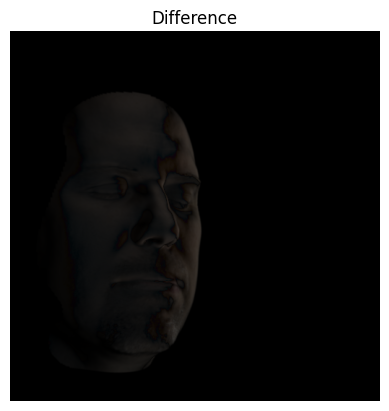

In [5]:
diff = np.abs(parallel - orthogonal)

plt.imshow(diff ** (1.0 / 2.2))
plt.axis("off")
plt.title("Difference")
plt.show()

In [6]:
unpol = 2 * np.fmin(parallel, orthogonal)
pol = parallel - unpol / 2

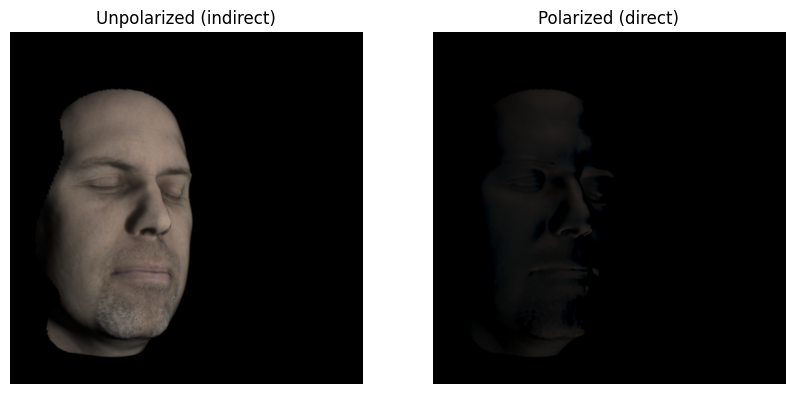

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 20))

ax[0].imshow(unpol ** (1.0 / 2.2))
ax[0].axis("off")
ax[0].set_title("Unpolarized (indirect)")

ax[1].imshow(pol ** (1.0 / 2.2))
ax[1].axis("off")
ax[1].set_title("Polarized (direct)")

plt.show()

In [8]:
params = mi.traverse(scene)
print(params)

SceneParameters[
  -------------------------------------------------------------------------------------------------
  Name                                          Flags    Type              Parent
  -------------------------------------------------------------------------------------------------
  sensor.near_clip                                       float             PerspectiveCamera
  sensor.far_clip                                        float             PerspectiveCamera
  sensor.shutter_open                                    float             PerspectiveCamera
  sensor.shutter_open_time                               float             PerspectiveCamera
  sensor.film.size                                       ScalarVector2u    HDRFilm
  sensor.film.crop_size                                  ScalarVector2u    HDRFilm
  sensor.film.crop_offset                                ScalarPoint2u     HDRFilm
  sensor.x_fov                                  ∂, D     Float             Persp